In [208]:
import sys
sys.path.append("../../../")
import utilssphering
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [236]:
def top_bottom_features(df: pd.DataFrame, num: int = 10):
    # Drop columns that we don't need
    drop_cols = df.columns[df.columns.str.contains("kstest_statistic|_Location_|Children|Parent|Number_Object")]

    df = df.drop(columns=drop_cols)

    # pvalues are determined between all combinations with replacement, so remove the 
    # identical comparisons
    df = df[df["Assay_Plate_Barcode_plate1"] != df["Assay_Plate_Barcode_plate2"]]

    compartments = ["Nuclei", "Cytoplasm", "Cells"]

    result_df = pd.DataFrame()

    for compart in compartments:
        subset_cols = [col for col in df.columns if compart in col]
        sub_df = df[subset_cols]
        # print(sub_df.columns)

        # Find the first 3 words of column names that will be used for grouping
        group_words = [col.split("_")[:3] for col in subset_cols]
        # Join them back
        group_words = ["_".join(w) for w in group_words]

        # Find the mean for the feature groups
        result_df = pd.concat([result_df, sub_df.groupby(group_words, axis=1).mean().mean(axis=0).reset_index()])

    result_df = result_df.rename(columns={"index": "Feature", 0: "pvalue"})

    top_features = result_df.sort_values(by="pvalue", ascending=False)[:num]
    top_features.index = np.arange(1, num+1)

    bottom_features = result_df.sort_values(by="pvalue")[:num]
    bottom_features.index = np.arange(1, num+1)

    t_b_feats = pd.concat([top_features, bottom_features], axis=1)

    return t_b_feats

In [237]:
df = pd.read_csv("../../../data/MolDev_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
t_b_feats = top_bottom_features(df)
t_b_feats
# t_b_feats.to_csv("S8A-moldev-top_bottom_features.csv", index=False, float_format='%f')


,Feature,pvalue,Feature,pvalue
1,Cytoplasm_AreaShape_Eccentricity,0.330,Cells_AreaShape_EulerNumber,0.000
2,Cells_Neighbors_SecondClosestDistance,0.217,Nuclei_AreaShape_MedianRadius,0.000
3,Cytoplasm_AreaShape_MeanRadius,0.197,Cells_AreaShape_Extent,0.000
4,Cytoplasm_AreaShape_MedianRadius,0.190,Cells_Neighbors_NumberOfNeighbors,0.000
5,Cytoplasm_AreaShape_MinorAxisLength,0.165,Nuclei_AreaShape_MaximumRadius,0.000
6,Cells_AreaShape_EquivalentDiameter,0.163,Nuclei_AreaShape_MinFeretDiameter,0.000
7,Cells_AreaShape_MinorAxisLength,0.149,Nuclei_AreaShape_MeanRadius,0.000
8,Nuclei_Neighbors_SecondClosestDistance,0.129,Nuclei_AreaShape_MinorAxisLength,0.000
9,Cytoplasm_AreaShape_MaximumRadius,0.123,Cytoplasm_Intensity_MassDisplacement,0.000
10,Cells_AreaShape_FormFactor,0.123,Nuclei_AreaShape_EquivalentDiameter,0.000


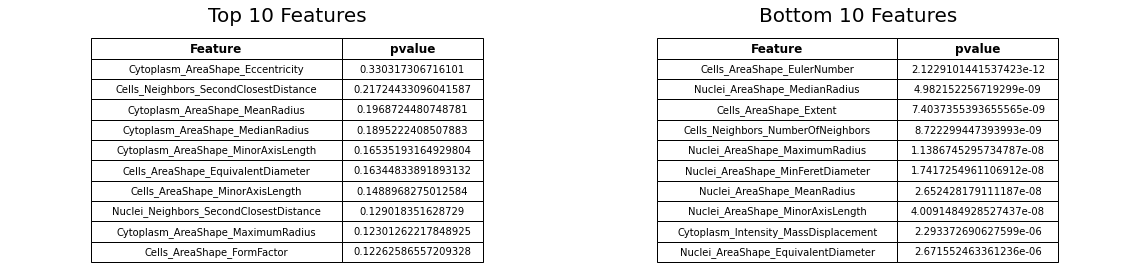

In [239]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

table1 = ax[0].table(cellText=t_b_feats.values[:,0:2], colLabels=t_b_feats.columns[0:2], loc='center', cellLoc='center')
table2 = ax[1].table(cellText=t_b_feats.values[:,2:], colLabels=t_b_feats.columns[2:], loc='center', cellLoc='center')

ax[0].axis('off')
ax[1].axis('off')

ax[0].set_title("Top 10 Features", size=20)
ax[1].set_title("Bottom 10 Features", size=20)


for key, cell in table1.get_celld().items():
    if key[0] == 0 or key[1] == -1:
        text = table1._cells[key].get_text()
        text.set_fontweight('bold')
        text.set_fontsize(12)

for key, cell in table2.get_celld().items():
    if key[0] == 0 or key[1] == -1:
        text = table2._cells[key].get_text()
        text.set_fontweight('bold')
        text.set_fontsize(12)

table1.auto_set_font_size(False)
table2.auto_set_font_size(False)
table1.auto_set_column_width(col=list(range(3)))
table2.auto_set_column_width(col=list(range(3)))

table1.scale(1.5, 1.5)
table2.scale(1.5, 1.5)
fig.tight_layout()
fig.set_facecolor("white")

fig.savefig("test.png", dpi=300)

In [230]:
t_b_feats.iloc[:, [0, 2]].columns

Index(['Feature', 'Feature'], dtype='object')

In [57]:
df = pd.read_csv("../../../data/Nikon_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
top_features, bottom_features = top_bottom_features(df)
t_b_feats = pd.concat([top_features, bottom_features], axis=1)

t_b_feats.to_csv("S8B-nikon-top_bottom_features.csv", index=False, float_format='%f')

In [58]:
df = pd.read_csv("../../../data/PE_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
top_features, bottom_features = top_bottom_features(df)
t_b_feats = pd.concat([top_features, bottom_features], axis=1)

t_b_feats.to_csv("S8C-pe-top_bottom_features.csv", index=False, float_format='%f')

In [186]:
df = pd.read_csv("../../../data/Yokogawa_US_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
top_features, bottom_features = top_bottom_features(df)
t_b_feats = pd.concat([top_features, bottom_features], axis=1)

t_b_feats.to_csv("S8D-yokogawa_us-top_bottom_features.csv", index=False, float_format='%f')

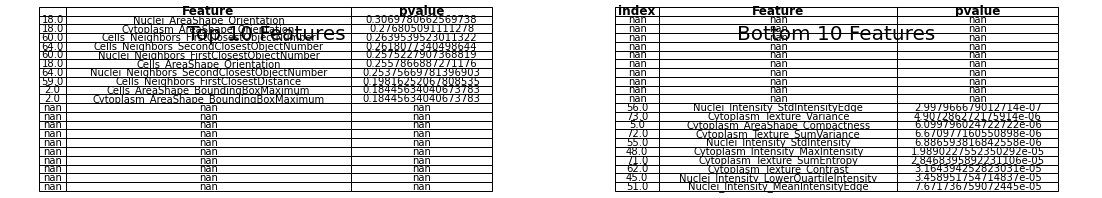

In [187]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

table1 = ax[0].table(cellText=t_b_feats.values[:,0:3], colLabels=t_b_feats.columns[0:3], loc='center', cellLoc='center')
table2 = ax[1].table(cellText=t_b_feats.values[:,3:], colLabels=t_b_feats.columns[3:], loc='center', cellLoc='center')

ax[0].axis('off')
ax[1].axis('off')

ax[0].set_title("Top 10 Features", size=20)
ax[1].set_title("Bottom 10 Features", size=20)


for key, cell in table1.get_celld().items():
    if key[0] == 0 or key[1] == -1:
        text = table1._cells[key].get_text()
        text.set_fontweight('bold')
        text.set_fontsize(12)

for key, cell in table2.get_celld().items():
    if key[0] == 0 or key[1] == -1:
        text = table2._cells[key].get_text()
        text.set_fontweight('bold')
        text.set_fontsize(12)

table1.auto_set_font_size(False)
table2.auto_set_font_size(False)
table1.auto_set_column_width(col=list(range(3)))
table2.auto_set_column_width(col=list(range(3)))
# table1.set_fontsize(12)
table1.scale(1.5, 1.5)
table2.scale(1.5, 1.5)
fig.tight_layout()

fig.savefig("test.png", dpi=300)

In [130]:
table1._cells[cell]

In [101]:
t_b_feats.values[:,0:2]

array([['Nuclei_AreaShape_Orientation', 0.3069780662569738],
       ['Cytoplasm_AreaShape_Orientation', 0.276805091111278],
       ['Cells_Neighbors_FirstClosestObjectNumber', 0.2639539523011322],
       ['Cells_Neighbors_SecondClosestObjectNumber', 0.2618077340498644],
       ['Nuclei_Neighbors_FirstClosestObjectNumber', 0.2575227907368819],
       ['Cells_AreaShape_Orientation', 0.2557866887271176],
       ['Nuclei_Neighbors_SecondClosestObjectNumber',
        0.25375669781396903],
       ['Cells_Neighbors_FirstClosestDistance', 0.19816252067808535],
       ['Cells_AreaShape_BoundingBoxMaximum', 0.18445634040673783],
       ['Cytoplasm_AreaShape_BoundingBoxMaximum', 0.18445634040673783]],
      dtype=object)